In [1]:
import math
import numpy as np
from diffusions_maps import diffusion_map
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D

## Part I
Set constants and calculate λ, Φ in accordance with the algorithm

given in the exercise sheet via separate function diffusion_map.


In [2]:
# Set constants/values
N = 1000
pi = math.pi
k = np.linspace(1, N, N)
tk = 2*pi*k/(N+1)
x = np.column_stack((np.cos(tk), np.sin(tk)))
num_values = 5
#plt.plot(k, x[0])
#plt.plot(k, x[1])
λ, Φ = diffusion_map(x, num_values)

Plot obtained values as stated in the exercise sheet

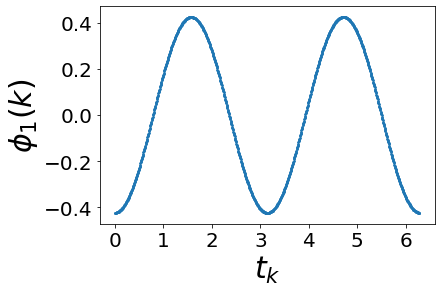

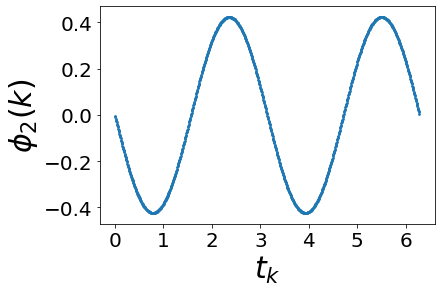

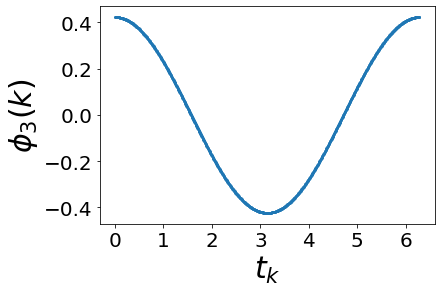

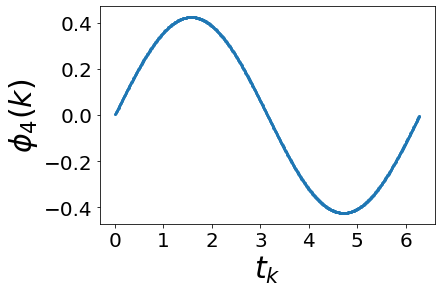

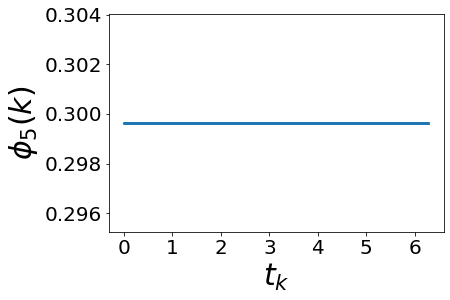

In [3]:
for i, eigenvectors in enumerate(Φ.T):
    plt.figure()
    plt.scatter(tk, eigenvectors, s = 3)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.locator_params(axis='y', nbins=5)
    plt.xlabel(r'$t_k$', fontsize = 30)
    plt.ylabel(fr'$\phi_{i+1}(k)$', fontsize = 30)
    plt.show()

## Part II
Generate the requested data and visualise it

(-10, 10)

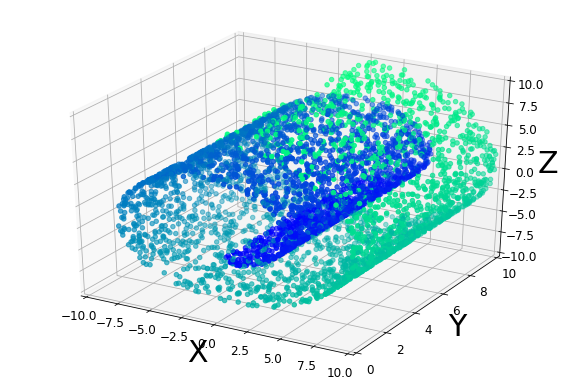

In [4]:
N = 5000
X_es, t = make_swiss_roll(N, random_state = 1337)

# Normalise so that (u,v) ∈ [0,10]
X = X_es[:, 0]
Y = X_es[:, 1]
Z = X_es[:, 2]
X, Y, Z = 10*X/np.max(X), 10*Y/np.max(Y), 10*Z/np.max(Z)

# Plot the figure
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(211, projection='3d')

ax.scatter(X, Y, Z, c=t, cmap='winter')
ax.tick_params(labelsize = 'larger')
ax.set_xlabel("X", fontsize = 30)
ax.set_ylabel("Y", fontsize = 30)
ax.set_zlabel("Z", fontsize = 30)
ax.set_xlim3d(-10,10)
ax.set_ylim3d(0,10)
ax.set_zlim3d(-10,10)

Set constants and calculate λ, Φ in accordance with the algorithm

given in the exercise sheet via separate function diffusion_map.

In [5]:
num_values = 11
λ, Φ = diffusion_map(X_es, num_values)